<a href="https://colab.research.google.com/github/arushi1612/TelecomCustomerChurn/blob/main/TelecomCustomerChrun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,roc_curve,auc
import warnings
warnings.filterwarnings('ignore')

# Reading CSV file

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/CustomerChurn.csv").set_index('customerID')
df.head()
#setting customerID as IndexColumn because it is the primary key

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Pre-processing



In [ ]:
df.shape

(7043, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

Since TotalCharges is supposed to be a numerical column, therefore converting it into float.
And, Senior Citizen is a categorical column, therefore mapping it into Yes or No.

In [ ]:
#changes the data type and values as per requirement
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes', 0: 'No'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [ ]:
#checking for null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Filter rows where 'TotalCharges' is null
missing_charges_rows = df[df['TotalCharges'].isnull()]

# Display the filtered rows
missing_charges_rows

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


In [ ]:
#handling missing values
df['TotalCharges'] = df['TotalCharges'].fillna(0)

As TotalCharges = Tenure*MonthlyCharges, and we can see from the above data that nan values in totalCharges are only for tenure 0 observations. So clealy totalCharges is 0 for those observations.

In [ ]:
df.duplicated().sum()

22

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [ ]:
# checking unique value of columns having only OBJECT datatype
for col in df.columns:
   if df[col].dtype == 'object':
        print(f'{col} : {df[col].unique()}', df[col].nunique())

gender : ['Female' 'Male'] 2
SeniorCitizen : ['No' 'Yes'] 2
Partner : ['Yes' 'No'] 2
Dependents : ['No' 'Yes'] 2
PhoneService : ['No' 'Yes'] 2
MultipleLines : ['No phone service' 'No' 'Yes'] 3
InternetService : ['DSL' 'Fiber optic' 'No'] 3
OnlineSecurity : ['No' 'Yes' 'No internet service'] 3
OnlineBackup : ['Yes' 'No' 'No internet service'] 3
DeviceProtection : ['No' 'Yes' 'No internet service'] 3
TechSupport : ['No' 'Yes' 'No internet service'] 3
StreamingTV : ['No' 'Yes' 'No internet service'] 3
StreamingMovies : ['No' 'Yes' 'No internet service'] 3
Contract : ['Month-to-month' 'One year' 'Two year'] 3
PaperlessBilling : ['Yes' 'No'] 2
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 4
Churn : ['No' 'Yes'] 2


### EDA

## **Categorical Analysis**

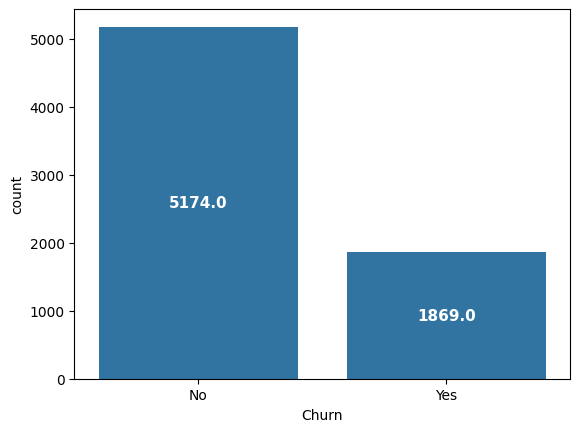

In [ ]:
ax = sns.countplot(x = df["Churn"])
ax = plt.gca() # gca - get current axis
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', #ax.annotate - annotates the bar with its count
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center',# ha & va sets the horizontal and vertical allignment of the text
                fontsize=11, color='white', weight='bold')
plt.show()

**Interpretation**

- We have imbalanced data.
- Almost 27% of the customers didn't continue with the company and churned.
- 1869 customer churned.
- Almost 73% of the customers continue with the company and didn't churn.
- 5174 customer didn't churn.


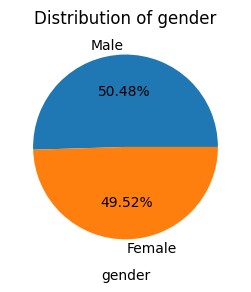

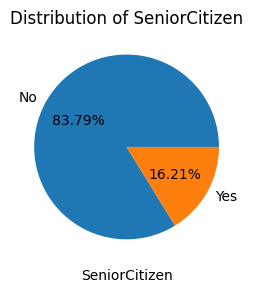

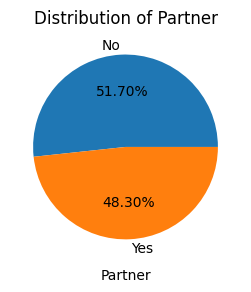

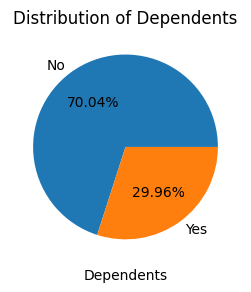

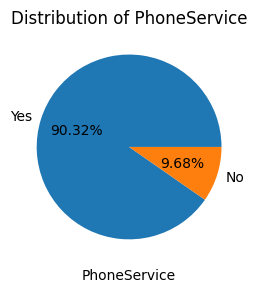

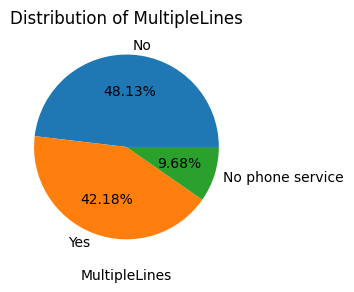

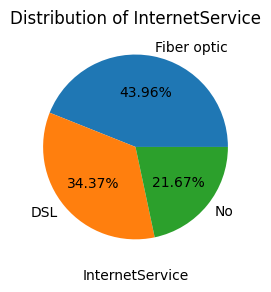

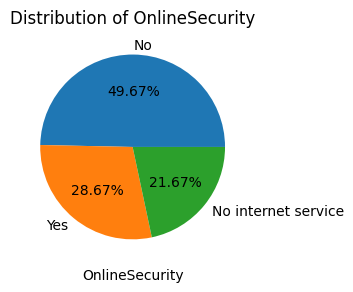

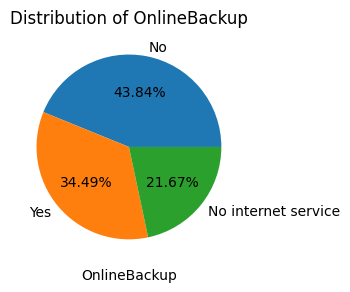

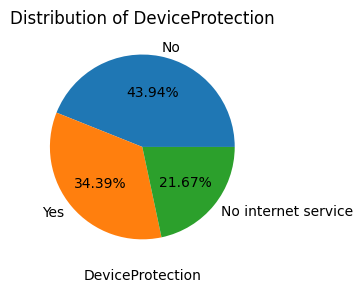

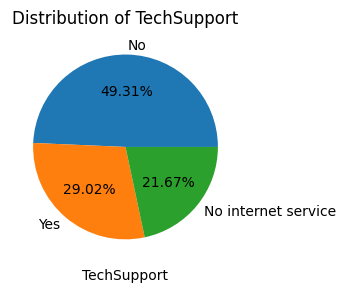

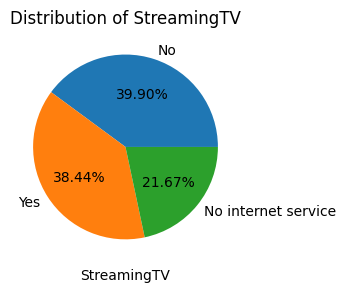

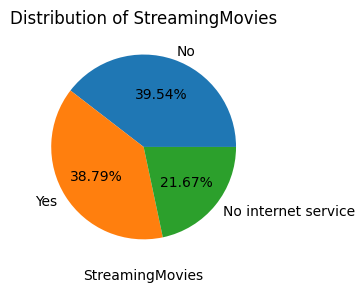

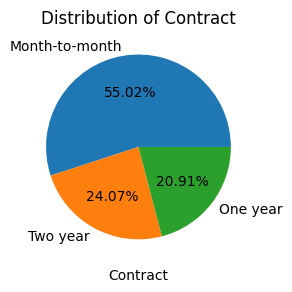

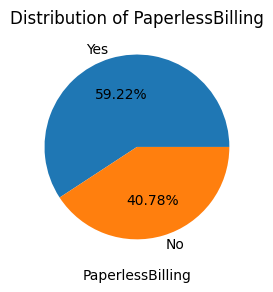

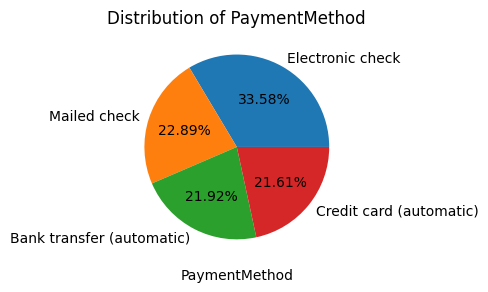

In [ ]:
categorical_columns=df.select_dtypes(include=['object', 'category']).columns

for cols in df[categorical_columns]:
  if cols=='Churn':
    continue
  plt.figure(figsize=(5,3))
  value_counts = df[cols].value_counts()
  plt.pie(value_counts, labels=value_counts.index, autopct='%.2f%%')
  plt.title(f'Distribution of {cols}')
  plt.xlabel(f'{cols}')
  plt.show()

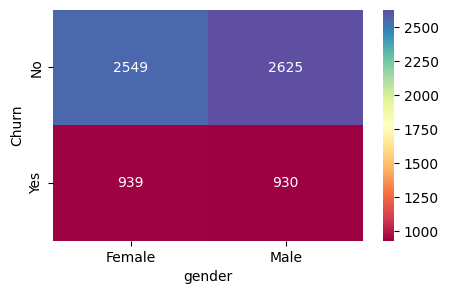

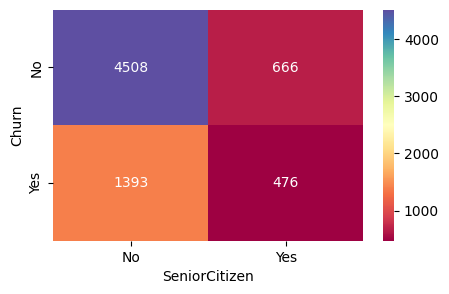

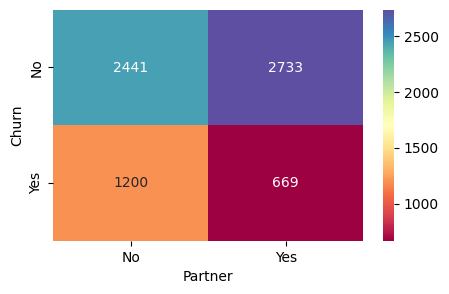

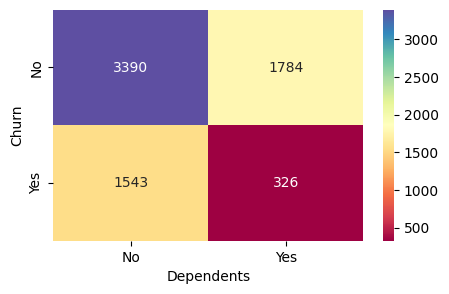

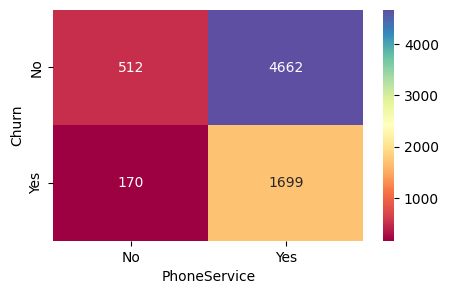

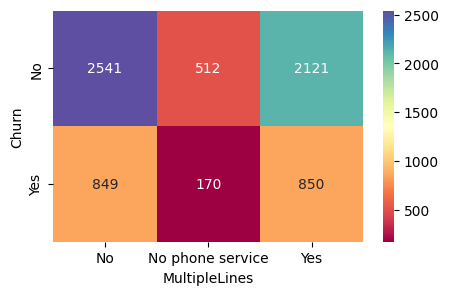

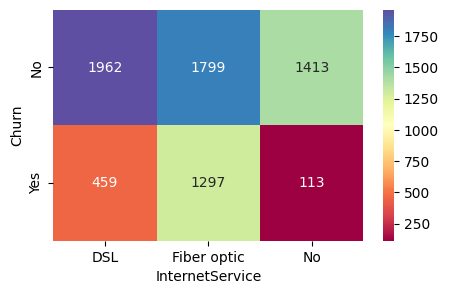

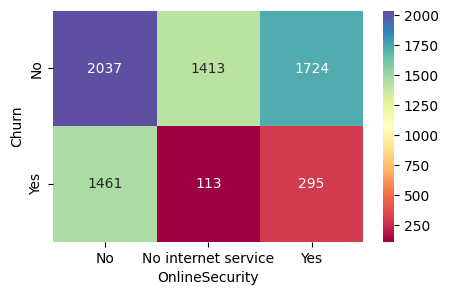

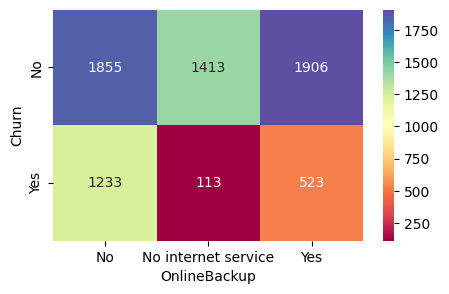

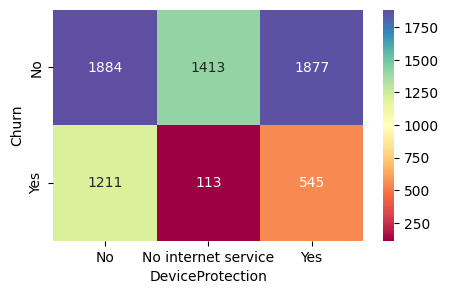

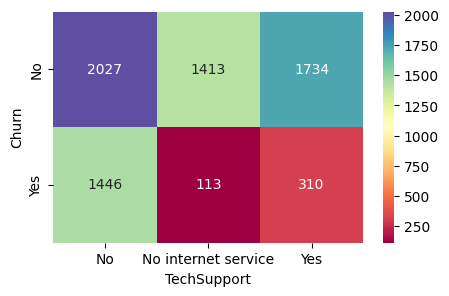

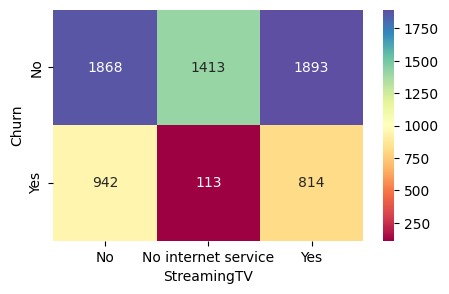

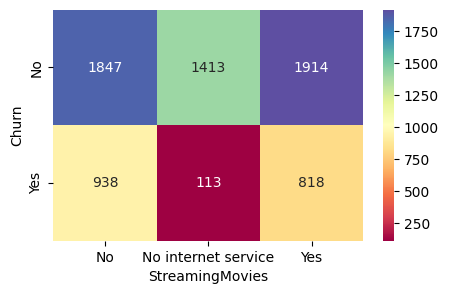

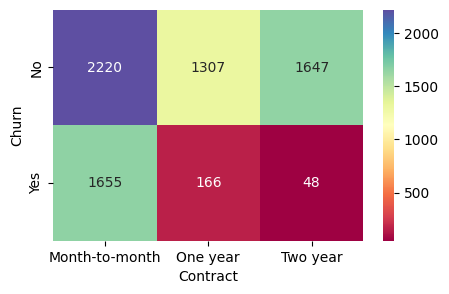

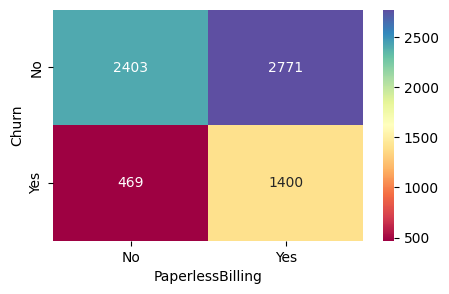

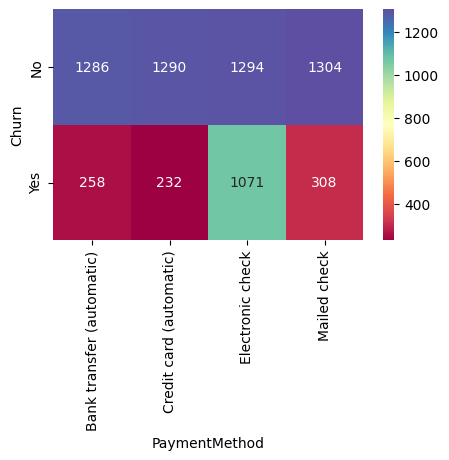

In [ ]:
for cols in df[categorical_columns]:
  if cols=='Churn':
    continue
  contingency_table=pd.crosstab(index=df['Churn'],columns=df[cols])
  plt.figure(figsize=(5, 3))
  sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Spectral') # annot true: values should be printed and fmt='d': as integers
  plt.xlabel(f'{cols}')
  plt.ylabel('Churn')
  plt.show()
  print('\n')

**Interpretation**

- **`Gender`** : There is not much difference between gender on the churn rate. We won't include gender into our model.
- **`Partner`** :  Customer without any relationship, single customer almost 1.7 times more likely churn than cutomer with a partner.
- **`Dependents`** : Customer without any dependents, almost 2.03 times more likely churn than cutomer with a dependent.

*   Senior citizen more likely churn than younger customers.

- **`Phone Service`**: Churn rate difference between customer has a phone service with the company and customer does not have a home phone service with the company is very small. We won't include phone service into our model.
- **`Multiple Lines`** : Churn rate difference between customer has a multiple lines phone service with the company and customer does not have a multiple line phone service with the company is very small.But we'll consider it due to the chi sq test
- **`Internet Service`** : Customer with fiber optic internet with the company compare to customer without any internet service with the company 5.66 times more likely to churn.
- **`Online Security`**: A customer with an online security service with the company almost 2.14 times less likely to leave the company than a customer without any online security service with the company.
- **`Online Backup`** A customer with an online backup service with the company almost 1.35 times less likely to leave the company than a customer without any online backup service with the company.
- **`Device Protection`** : A customer with a device protection service with the company almost 1.27 times less likely to leave the company than a customer without any a device protection service with the company.
- **`Tech Support`** : A customer with a Tech Support service with the company almost 2.06 times less likely to leave the company than a customer without any a Tech Support service with the company.
- **`Streaming TV Service`** : A customer with a Streaming TV service with the company almost 1.24 times more likely to leave the company than a customer without any a Streaming TV service with the company.
- **`Streaming Movies Service`** : A customer with a Streaming Movies service with the company almost 1.23 times more likely to leave the company than a customer without any a Streaming movies service with the company.
- **`Contract Type`** :  
    - Customer with the 2 year contract almost 15.1 times less likely to churn compare to customer with a monthly contract.
    - On the other hand customer with the 1 year contract almost 3.79 times less likely to churn compare to customer with a monthly contract.
- **`Paperless Billing`** : A customer with a paperless billing with the company almost 2.06 times more likely to leave the company than a customer without a paperless billing with the company.
- **`Payment Method`** : Almost half of the customers with a payment method as a Electornic Check churned out, which is a quite big percentage.


**Numerical Analysis**

In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Maximum tenure is 72 months. Mean tenure is 32 months, more than 25% customers stay with the telecom company for 55 months.

Minimum MonthlyCharges are 18.25 units. Maximum MonthlyCharges are 118.75 units. Mean MonthlyCharges are 64.75 units.

Mean TotalCharges is 2279.73 units.

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64

In [ ]:
df[numerical_columns].kurtosis()

tenure           -1.387372
MonthlyCharges   -1.257260
TotalCharges     -0.228580
dtype: float64

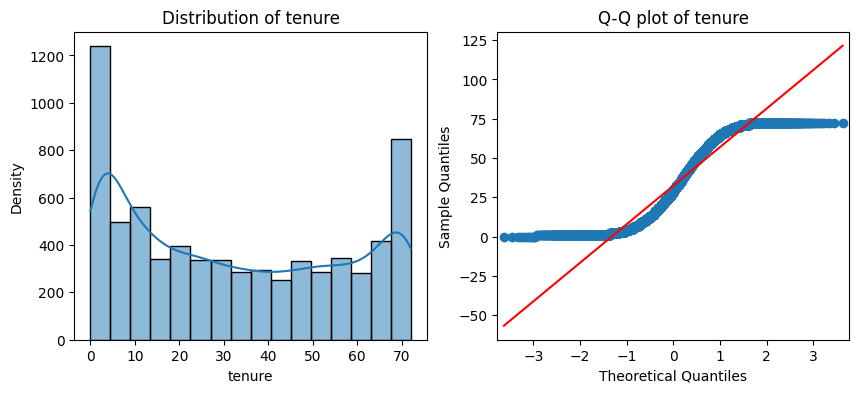

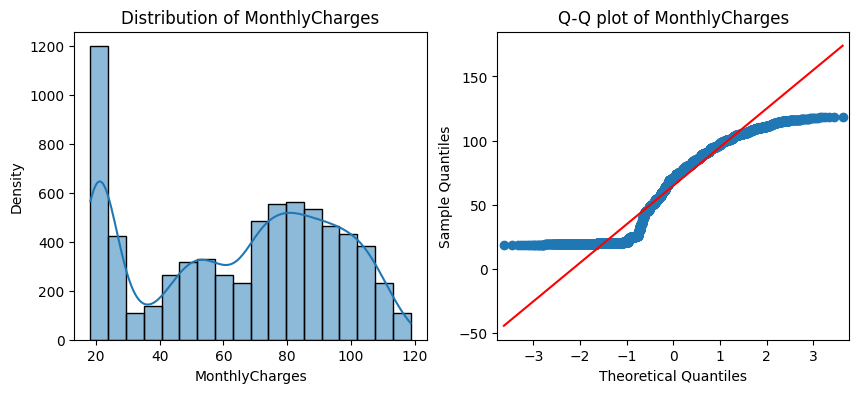

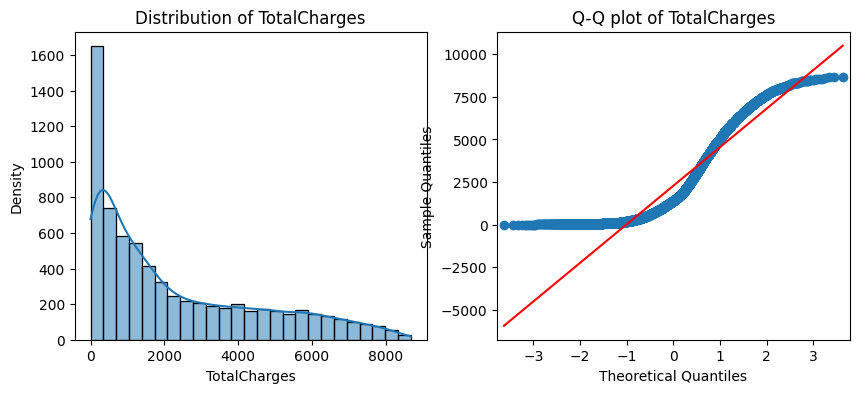

In [ ]:
for cols in numerical_columns:
  fig, axes = plt.subplots(1, 2, figsize=(10, 4))
  sns.histplot(data=df, kde=True, x=df[cols], fill=True,ax=axes[0])
  fig = sm.qqplot(df[cols], line='s',ax=axes[1])
  axes[0].set_title(f'Distribution of {cols}')
  axes[0].set_xlabel(f'{cols}')
  axes[0].set_ylabel('Density')
  axes[1].set_title(f'Q-Q plot of {cols}')
  plt.show()


**Interpretation**

Monthly charges : The distribution of MonthlyCharges is bimodal, with two distinct peaks and The presence of significant deviations in the Q-Q plot represent non-normality.

Total Charges : The TotalCharges plot shows a right-skewed distribution with a high frequency of customers having low total charges and a few customers having very high total charges.The presence of significant deviations in the Q-Q plot represent non-normality.

Tenure : The distribution is bimodal, with more customers having lesser tenures.The presence of significant deviations in the Q-Q plot represents non-normality.


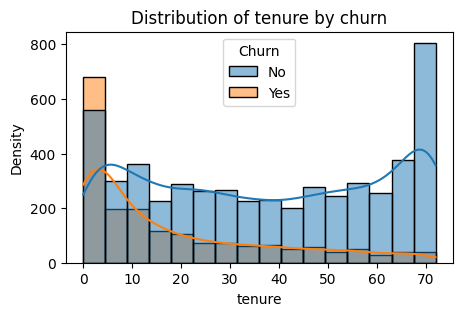

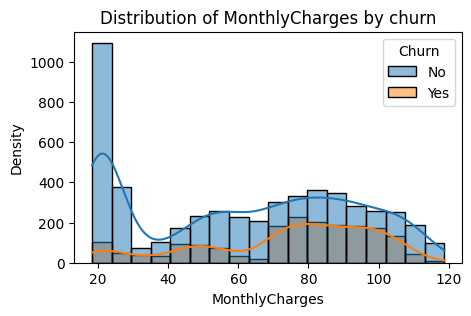

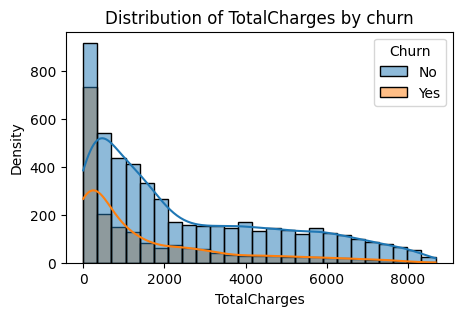

In [ ]:
for cols in numerical_columns:
  plt.figure(figsize=(5,3))
  sns.histplot(data=df, kde=True, x=df[cols], hue='Churn', fill=True)
  plt.title(f'Distribution of {cols} by Churn')
  plt.xlabel(f'{cols}')
  plt.ylabel('Density')
  plt.title(f'Distribution of {cols} by churn')
  plt.show()

**Interpretation**

Customers with shorter **tenures** are more likely to churn, while customers with longer tenures are less likely to churn, indicating a correlation between longer customer tenure and reduced churn rates.

Customers with lower **monthly charges** (around 20) are less likely to churn, with the highest density of non-churned customers in this range. As monthly charges increase, the churn density is more evenly distributed but still lower than non-churned customers across most charge intervals.

Customers with lower **total charges** (around 0 to 1000) have a higher likelihood of churn. As total charges increase, the churn rate decreases, with the density of non-churned customers remaining consistently higher across higher total charges.

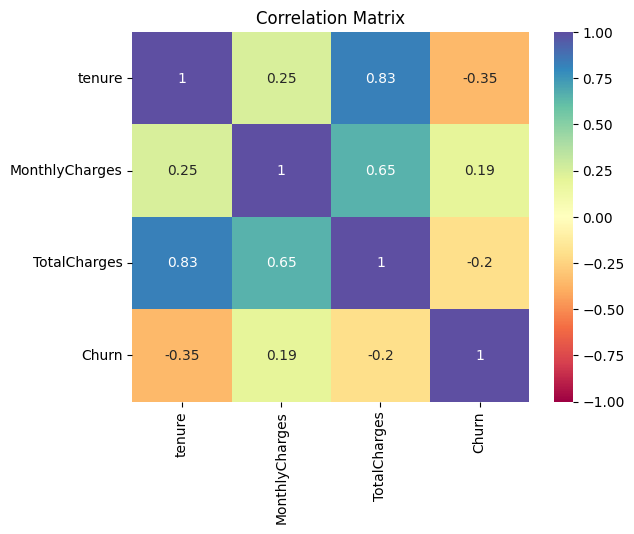

In [ ]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0}).astype(int)
numerical_columns = df.select_dtypes(include=['number']).columns
x=df[numerical_columns].corr()
sns.heatmap(x, vmin=-1,annot=True, vmax=1,cmap='Spectral')
plt.title('Correlation Matrix')
plt.show()

**Interpretation**

* Based on the matrix, we can observe weak level correlation between the numerical features and the target variable
* There is strong correlation between tenure and total charges.
* Customer with higher monthly charges also more likely churn than lesser monthly charges customers.
* Being long term with the company, customer less likely churn than customer  with lesser time with the company.
* Total charges has negative correlation with the churn.

**Outlier Analysis**
As totalcharges is product of monthlycharge and tenure , so theoratically there would be no outliers in the column as it depends on them.
As tenure is time period of continuing the service so there will be no outliers.


# Encoding variables

In [ ]:
#split data into training and testing
df_train, df_test = train_test_split(df ,test_size=0.2, random_state=42)

In [ ]:
# Label encoding on Churn column
label_encoder = LabelEncoder() #Initializing
df_train['Churn'] = label_encoder.fit_transform(df_train['Churn'])
df_test['Churn']=label_encoder.transform(df_test['Churn'])

In [ ]:
# Ordinal encoding on CONTRACT column
oe = OrdinalEncoder()
df_train['Contract'] = oe.fit_transform(df_train[['Contract']])
df_test['Contract'] = oe.transform(df_test[['Contract']])

In [ ]:
categorical_columns=df_train.select_dtypes(include=['object', 'category']).columns
numerical_columns = df_train.select_dtypes(exclude=['object', 'category']).columns  # Get numerical columns
ohe = OneHotEncoder(drop='first',handle_unknown='ignore', sparse_output=False)  # Use handle_unknown to avoid errors with unseen categories in the future

# Fit and transform the categorical columns
encoded_array = ohe.fit_transform(df_train[categorical_columns])
encoded_array_test = ohe.transform(df_test[categorical_columns])

# Get feature names for the encoded columns
feature_names = ohe.get_feature_names_out(categorical_columns)

# Create a new DataFrame from the encoded array
df_train_encoded = pd.DataFrame(encoded_array.astype(int), columns=feature_names, index=df_train.index) #Give the encoded dataframe a different name
df_test_encoded = pd.DataFrame(encoded_array_test.astype(int), columns=feature_names, index=df_test.index) #Give the encoded dataframe a different name

# Concatenate the encoded DataFrame with the numerical columns from the original DataFrame
# Assuming 'numerical_columns' is a list of numerical column names
df_train = pd.concat([df_train[numerical_columns], df_train_encoded], axis=1)  # Concatenate numerical and encoded columns
df_test = pd.concat([df_test[numerical_columns], df_test_encoded], axis=1)  # Do the same for test data

MODEL

*Feature Selection*

Applying **Z-test** to see association of numerical predictor variables with target variable.

Assumption of Z-test:

1) sample size should be greater than 30 and population variance must be known ( If it is not known but the sample size is large, the sample variance can be used as an approximation.)

2) Z test is a statistical test that is conducted on normally distributed data.(Bu using CLT our data is normally distributed)

In [ ]:
print('H0: there is no difference in the means of the predictor variable between the two groups (churned and non-churned customers)')
print('H1: there is a difference in the means of the predictor variable between the two groups (churned and non-churned customers)\n')

for i in ['MonthlyCharges', 'TotalCharges', 'tenure']:
  churned = df_train[df_train['Churn'] == 1][i]
  not_churned = df_train[df_train['Churn'] == 0][i]
  z_score, p_value = sm.stats.ztest(churned, not_churned)
  print(f"Z-test results for {i}:")
  print("Z-score:", z_score)
  print("P-value:", p_value)
  if p_value < 0.05:
    print("Reject the null hypothesis at 5% LOS \n")
  else:
    print("Fail to reject the null hypothesis at 5% LOS \n")

H0: there is no difference in the means of the predictor variable between the two groups (churned and non-churned customers)
H1: there is a difference in the means of the predictor variable between the two groups (churned and non-churned customers)

Z-test results for MonthlyCharges:
Z-score: 14.4103974568294
P-value: 4.451413396141805e-47
Reject the null hypothesis at 5% LOS 

Z-test results for TotalCharges:
Z-score: -14.790924552302876
P-value: 1.6763519511031782e-49
Reject the null hypothesis at 5% LOS 

Z-test results for tenure:
Z-score: -27.577918801362124
P-value: 2.0478500830648553e-167
Reject the null hypothesis at 5% LOS 



At 5% LOS we will reject null hypothesis for MonthlyCharges, TotalCharges and tenure i.e there is difference in the means of the predictor variable between the two groups (churned and non-churned customers). Hence, these explanatory variables are somewhere associated with churn.

Applying **Chi-Sq** test to see association of categorical explanatory variable with target variable.

Assumptions of Chi-Sq test

a) Both variables are categorical

b) observation should be independent

c) Cells in the contingency table are mutually exclusive.: It’s assumed that individuals can only belong to one cell in the contingency table. That is, cells in the table are mutually exclusive – an individual cannot belong to more than one cell.

d) Expected value of cells should be 5 or greater in at least 80% of cells

In [ ]:
# applying chisq test to see whether predictors are independent
categorical_columns=df_train.drop(['tenure','MonthlyCharges','TotalCharges','Contract'],axis=1)
results_list = []
descision_list=[]
for k in range(len(categorical_columns.columns)):
  contingency_table = pd.crosstab(categorical_columns[categorical_columns.columns[k]],df_train['Churn'])
  # Perform chi-squared test
  chi2, p, dof, expected = chi2_contingency(contingency_table)
  if( p < 0.05):
    descision_list.append('Reject H0')
  else:
    descision_list.append('Accept H0')

  results_df = pd.DataFrame({'Feature': categorical_columns.columns[k], 'Chi2 Statistic': chi2, 'P-Value': p,'Decision': descision_list[0] }, index=[0])
  descision_list = []
  results_list.append(results_df)

# Concatenate all results into a single DataFrame
print('H0: Churn is independent of the categorical feature')
print('H1: Churn is dependent on the categorical feature')
chi2_results = pd.concat(results_list, ignore_index=True)
chi2_results

H0: Churn is independent of the categorical feature
H1: Churn is dependent on the categorical feature


,Feature,Chi2 Statistic,P-Value,Decision
0,Churn,5628.873597,0.000000e+00,Reject H0
1,gender_Male,0.722885,3.951992e-01,Accept H0
2,SeniorCitizen_Yes,120.968753,3.881985e-28,Reject H0
3,Partner_Yes,113.386300,1.775777e-26,Reject H0
4,Dependents_Yes,147.707808,5.495451e-34,Reject H0
5,PhoneService_Yes,0.379799,5.377107e-01,Accept H0
6,MultipleLines_No phone service,0.379799,5.377107e-01,Accept H0
7,MultipleLines_Yes,7.215641,7.227098e-03,Reject H0
8,InternetService_Fiber optic,510.276582,5.521261e-113,Reject H0
9,InternetService_No,281.971725,2.792084e-63,Reject H0


Gender_male, PhoneService_Yes, MultipleLines_No phone service are independent of churn

In [ ]:
df_train=df_train.drop(['gender_Male','PhoneService_Yes','MultipleLines_No phone service'],axis=1)
df_test=df_test.drop(['gender_Male','PhoneService_Yes','MultipleLines_No phone service'],axis=1)

Accuracy: 0.8190205819730305

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Coefficients of each feature:

                                 Variable  Coefficient
0                                  tenure    -0.062020
1                                Contract    -0.689001
2                          MonthlyCharges    -0.001184
3                            TotalCharges     0.000374
4                       SeniorCitizen_Yes     0.203803
5                             Partner_Yes     0.060043
6                          Dependents_Yes    -0.151897
7                       MultipleLines_Yes     0.176184
8             InternetService_Fiber optic     0.443646
9                      InternetService

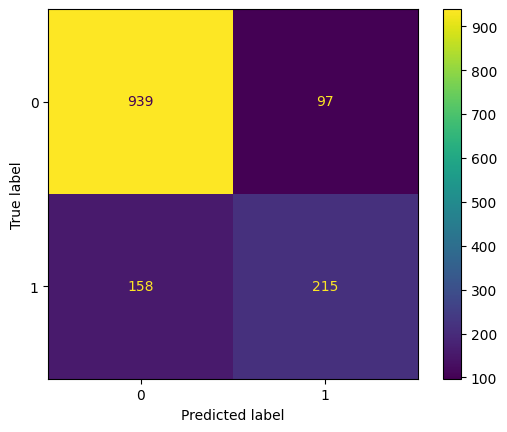

In [ ]:
#When using logistic regression in scikit-learn, you typically do not need to manually add an intercept (constant) column to your feature matrix because the LogisticRegression model in scikit-learn includes an intercept term by default.
model = LogisticRegression()
X_train=df_train.drop(['Churn'],axis=1)
y_train=df_train['Churn']
X_test=df_test.drop(['Churn'],axis=1)
y_test=df_test['Churn']
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", class_report)
#print("The coefficients are:",model.coef_)
coeffs = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': model.coef_[0]
})
print('Coefficients of each feature:\n')
print(coeffs)
print('\n')
print('Confusion matrix\n')

**In Confusion Matrix**

**Top Row** - represents no. of customers who didn't churn

**Bottom Row** - represents no. of customers who churned out

**Left Column** - Predicted no. of customers who didn't churn

**Right Column** - Predicted no. of customers who Churned out



**Interpretation**

*   Our model correctly indentified 939 customers who didn't churn (True Negative)

*   model incorrectly predicted 97 customers would churn when they actually didn't churn.(False Positive)

*   model missed 158 customers who did churned out.(False Negative)

*   model correctly identified 215 customers who did churned out.(True Positive)

now here missing customers(false negative - type2Error) is often a bigger bussiness problem than incorrectly predicting churn(false positive - type1Error)











**The columns having +vely signed coefficients impact churn more than columns having -vely signed coefficients.**

**Interpretation of Classification Report**

**For Churn 0:**

*   Precision = 0.86 means that out of all instances as churn 0, 86% were actually true churn 0.

*   Recall = 0.91 means that out of all actual churn 0 instances, the model correctly identified 90%.

**For Churn 1:**

*   Precision = 0.69 means that out of all instances predicted as churn 1, 69% were actually true churn 1.

*   Recall = 0.58 means that out of all actual churn 1 instances, the model correctly indentified 58%.





Clearly Type 2 error is more than Type 1 error.

**Takeaways:**

*   The model performs better at identifying Churn 0.
*   Churn 1 identification is less acurate, indicating potential areas for model improvement(e.g. feature engineering, hyperparameter tuning).



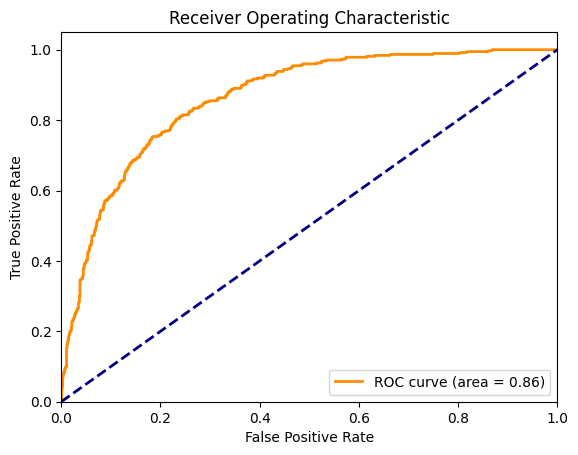

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Assumptions**


**1. MULTICOLLINEARITY**


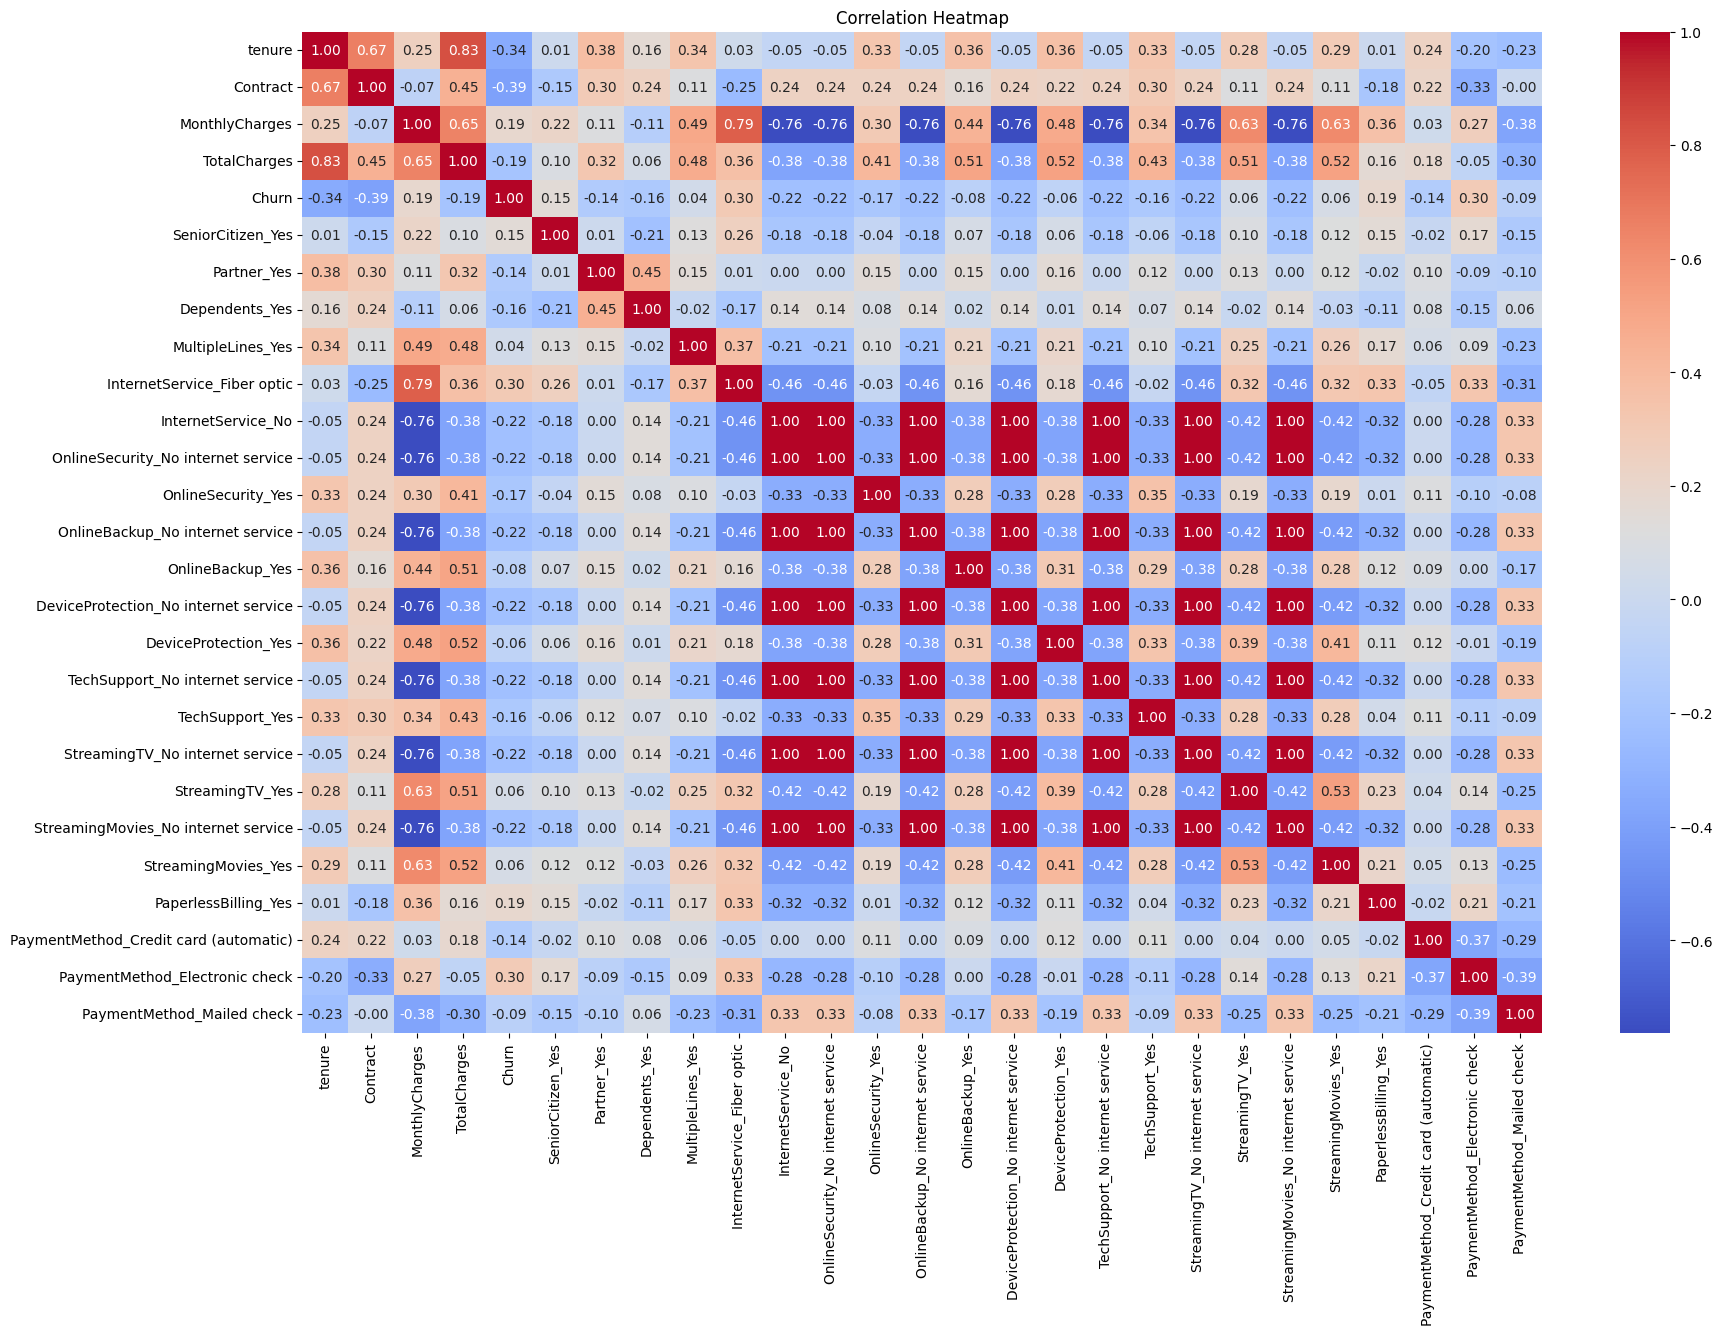

In [ ]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(20, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_train

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                                  Feature        VIF
0                                  tenure  17.859177
1                                Contract   4.216501
2                          MonthlyCharges  40.316749
3                            TotalCharges  19.331994
4                                   Churn   1.844720
5                       SeniorCitizen_Yes   1.366278
6                             Partner_Yes   2.830051
7                          Dependents_Yes   1.968290
8                       MultipleLines_Yes   2.725808
9             InternetService_Fiber optic   8.996027
10                     InternetService_No        inf
11     OnlineSecurity_No internet service        inf
12                     OnlineSecurity_Yes   2.247128
13       OnlineBackup_No internet service        inf
14                       OnlineBackup_Yes   2.405201
15   DeviceProtection_No internet service        inf
16                   DeviceProtection_Yes   2.471503
17        TechSupport_No internet service     

Droping columns having VIF inf and Total charges as it is derived column from monthlycharges*tenure

In [ ]:
df_train=df_train.drop(['TotalCharges'],axis=1)
df_test=df_test.drop(['TotalCharges'],axis=1)

In [ ]:
# Select columns with VIF = inf
vif_data_inf = vif_data[vif_data['VIF'] == np.inf]

# Print the columns with VIF = inf
print("Columns with VIF = inf:")
print(vif_data_inf['Feature'].tolist())

Columns with VIF = inf:
['InternetService_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service']


In [ ]:
# Get the list of features with infinite VIF
features_to_drop = vif_data_inf['Feature'].tolist()

# Drop those features from df_train and df_test
df_train = df_train.drop(features_to_drop, axis=1)
df_test = df_test.drop(features_to_drop, axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_train

# VIF dataframe
vif_data = pd.DataFrame()

vif_data["Feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                                  Feature        VIF
0                                  tenure   7.220327
1                                Contract   3.838510
2                          MonthlyCharges  38.611508
3                                   Churn   1.810661
4                       SeniorCitizen_Yes   1.364848
5                             Partner_Yes   2.822824
6                          Dependents_Yes   1.947557
7                       MultipleLines_Yes   2.557678
8             InternetService_Fiber optic   7.365623
9                      OnlineSecurity_Yes   2.042117
10                       OnlineBackup_Yes   2.183500
11                   DeviceProtection_Yes   2.317847
12                        TechSupport_Yes   2.174929
13                        StreamingTV_Yes   2.937098
14                    StreamingMovies_Yes   3.005297
15                   PaperlessBilling_Yes   2.903158
16  PaymentMethod_Credit card (automatic)   1.837593
17         PaymentMethod_Electronic check   2.

**2. Linearity**

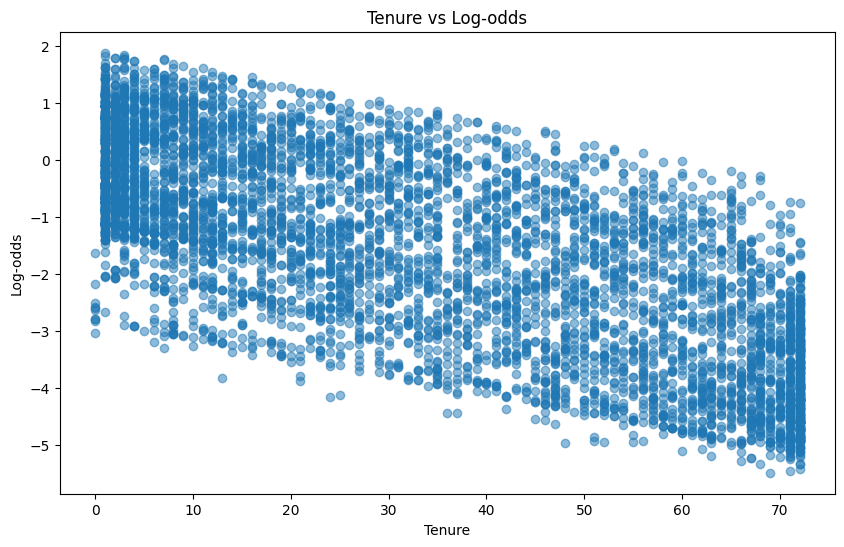

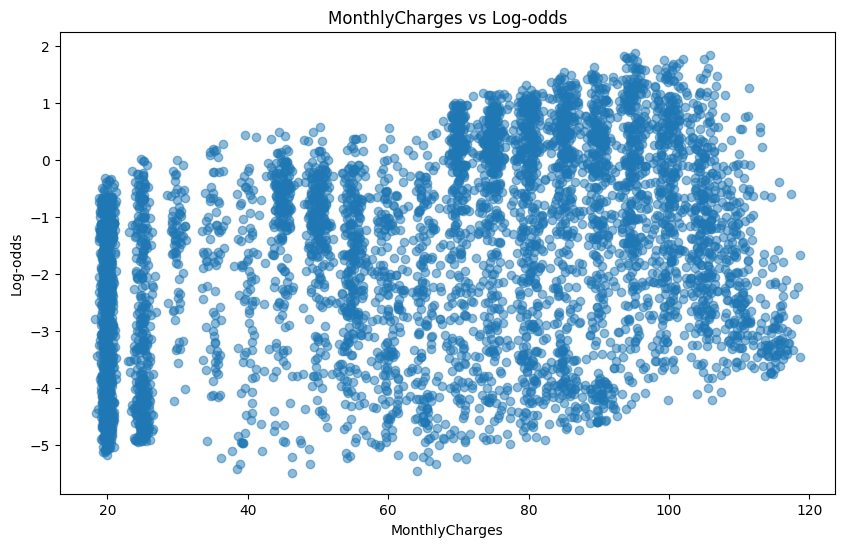

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming df is your dataframe and 'Churn' is the target variable
X = df_train.drop('Churn', axis=1)
y = df_train['Churn']

# If you have categorical variables, you may need to encode them
# For simplicity, let's assume X is already encoded and only needs scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

# Get predicted probabilities
predicted_probs = log_reg.predict_proba(X_scaled)[:, 1]

# Calculate log-odds
log_odds = np.log(predicted_probs / (1 - predicted_probs))

# Visualize predictor continuous variable vs log-odds (tenure, TotalCharges, MonthlyCharges)
plt.figure(figsize=(10, 6))
plt.scatter(df_train['tenure'].values, log_odds, alpha=0.5)
plt.ylabel('Log-odds')
plt.xlabel('Tenure')
plt.title('Tenure vs Log-odds')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_train['MonthlyCharges'].values, log_odds, alpha=0.5)
plt.ylabel('Log-odds')
plt.xlabel('MonthlyCharges')
plt.title('MonthlyCharges vs Log-odds')
plt.show()

**3. Residual Analysis(Independence)**

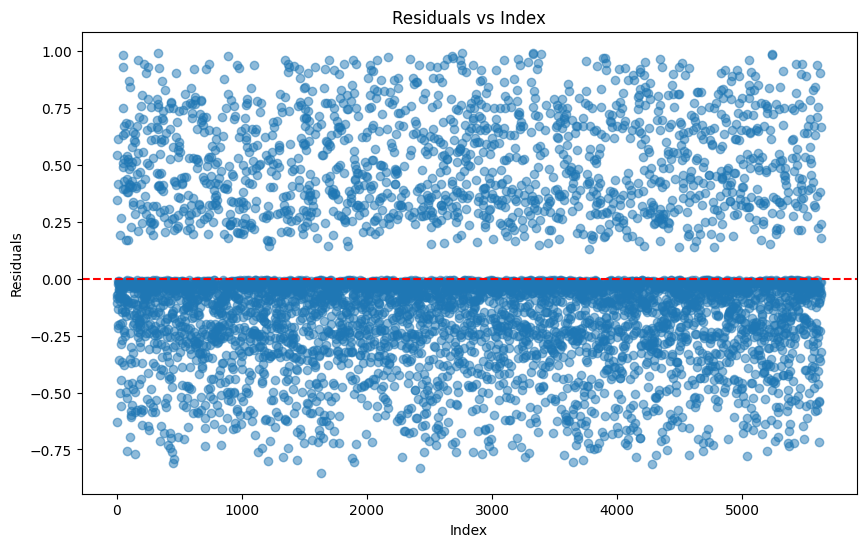

In [ ]:
model=LogisticRegression()
model.fit(X,y)
y_train_pred_prob = model.predict_proba(X)[:, 1]
residuals = y_train - y_train_pred_prob
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(residuals)), residuals, alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals vs Index')
plt.axhline(0, color='red', linestyle='--')
plt.show()

Interpretation
Random Scatter:
The residuals appear to be randomly scattered around the zero line without any obvious patterns. This randomness is a good sign and suggests that there is no significant autocorrelation among the residuals.

Absence of Patterns:
There are no discernible patterns, such as a trend or periodicity, in the residuals. Patterns would indicate a problem with independence, suggesting that the residuals (and thus the observations) are not independent of each other.

Consistent Variance:
The spread of the residuals seems consistent across the entire range of the index. This suggests that the variance of the residuals does not change with the order of observations, which is another indicator of independence.

Conclusion
Independence of Observations:
The residuals appear to be independent, as indicated by the random scatter around the zero line and the consistent spread of residuals across the index.

No Autocorrelation:
The lack of patterns or trends suggests that there is no significant autocorrelation in the residuals. This supports the assumption that the observations are likely independent.

# Applying the basic Logistic Regression model

In [ ]:
model = LogisticRegression()
X_train=df_train.drop(['Churn'],axis=1)
y_train=df_train['Churn']
X_test=df_test.drop(['Churn'],axis=1)
y_test=df_test['Churn']
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print('Classification report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8211497515968772
[[943  93]
 [159 214]]
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.57      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.76      1409
weighted avg       0.81      0.82      0.82      1409



# Applying logistic regression model by balancing the class weight

The data is imbalanced therefore we need to balance it first.

In [ ]:
model = LogisticRegression(class_weight='balanced')
X_train=df_train.drop(['Churn'],axis=1)
y_train=df_train['Churn']
X_test=df_test.drop(['Churn'],axis=1)
y_test=df_test['Churn']
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print('Classification report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.7551454932576295
[[754 282]
 [ 63 310]]
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



**HYPERPARAMETER OPTIMIZATION**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'] # only these two can be applied on both
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print('Confusion matrix\n')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print('Classification report:')
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7146912704045423
Confusion matrix

[[680 356]
 [ 46 327]]
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.66      0.77      1036
           1       0.48      0.88      0.62       373

    accuracy                           0.71      1409
   macro avg       0.71      0.77      0.70      1409
weighted avg       0.82      0.71      0.73      1409



classification_report of test :
              precision    recall  f1-score   support

           0       0.94      0.66      0.77      1036
           1       0.48      0.88      0.62       373

    accuracy                           0.71      1409
   macro avg       0.71      0.77      0.70      1409
weighted avg       0.82      0.71      0.73      1409



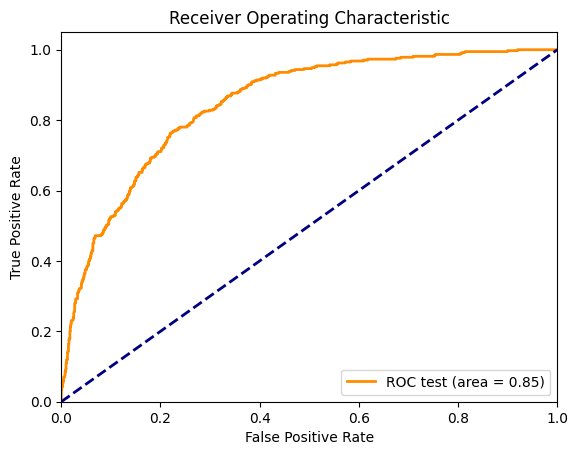

In [ ]:
model = LogisticRegression(C= 0.01, penalty= 'l1', solver= 'liblinear', class_weight='balanced', random_state=42)

model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

# Classification report
print("classification_report of test :")
print(classification_report(y_test, y_test_pred))

# ROC curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC test (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the hyperparameter distribution to sample from
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': stats.uniform(0.01, 10),
    'solver': ['liblinear', 'saga']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=5, scoring='recall', random_state=42)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print('Confusion matrix\n')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print('Classification report:')
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 0.06522117123602399, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.752306600425834
Confusion matrix

[[749 287]
 [ 62 311]]
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.75      0.77      1409



classification_report of test :
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.75      0.77      1409



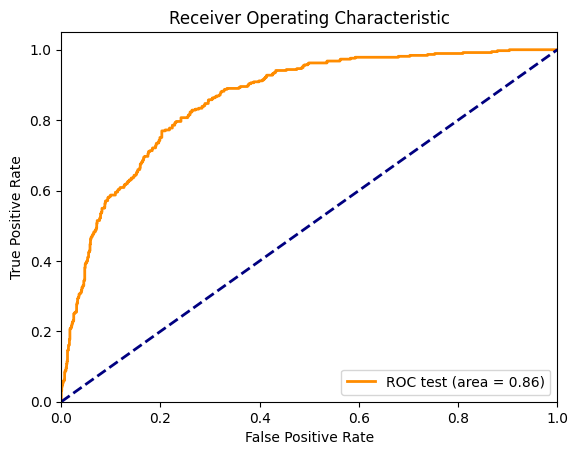

In [ ]:
model = LogisticRegression(C= 0.06522117123602399, penalty= 'l1', solver= 'liblinear', class_weight='balanced', random_state=42)

model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

# Classification report
print("classification_report of test :")
print(classification_report(y_test, y_test_pred))

# ROC curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC test (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

We are taking recall as our evaluating metric which increases on applying GridSearchCV and there is no effect on recall after applying RandomizedSearchCV. So we choose the following model
Logistic regression(C= 0.01, penalty= 'l1', solver= 'liblinear')

# Applying the final model

In [ ]:
# Define the model
model = LogisticRegression(C= 0.01, penalty= 'l1', solver= 'liblinear', class_weight='balanced', random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
coeffs = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': model.coef_[0]
})
print('Coefficients of each feature:\n')
print(coeffs)

Accuracy: 0.7146912704045423

Confusion Matrix:
 [[680 356]
 [ 46 327]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.66      0.77      1036
           1       0.48      0.88      0.62       373

    accuracy                           0.71      1409
   macro avg       0.71      0.77      0.70      1409
weighted avg       0.82      0.71      0.73      1409

Coefficients of each feature:

                                 Variable  Coefficient
0                                  tenure    -0.036849
1                                Contract    -0.719807
2                          MonthlyCharges     0.020176
3                       SeniorCitizen_Yes     0.000000
4                             Partner_Yes     0.000000
5                          Dependents_Yes     0.000000
6                       MultipleLines_Yes     0.000000
7             InternetService_Fiber optic     0.000000
8                      OnlineSecurity_Yes    -0.04

By Lasso Regression, we see that there are features having the coefficient as 0, therefore they are of no importance and therefore dropping these features, we train test split the model again.

In [ ]:
df_train=df_train.drop(['SeniorCitizen_Yes',
       'Partner_Yes', 'Dependents_Yes', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)'],axis=1)

In [ ]:
df_test=df_test.drop(['SeniorCitizen_Yes',
       'Partner_Yes', 'Dependents_Yes', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)'],axis=1)

Accuracy: 0.7146912704045423
[[680 356]
 [ 46 327]]
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.66      0.77      1036
           1       0.48      0.88      0.62       373

    accuracy                           0.71      1409
   macro avg       0.71      0.77      0.70      1409
weighted avg       0.82      0.71      0.73      1409

Coefficients of each feature:

                         Variable  Coefficient
0                          tenure    -0.036848
1                        Contract    -0.719816
2                  MonthlyCharges     0.020176
3              OnlineSecurity_Yes    -0.047062
4  PaymentMethod_Electronic check     0.085323
5      PaymentMethod_Mailed check    -0.060787


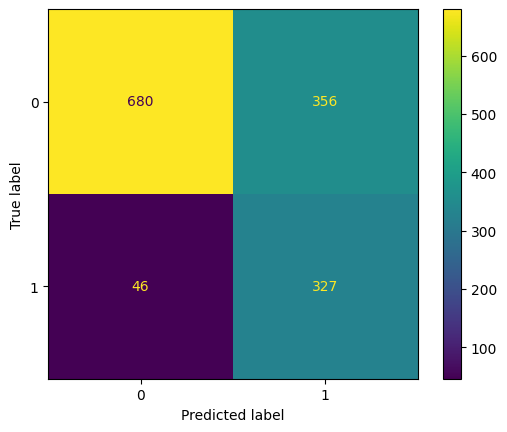

In [ ]:
model = LogisticRegression(C= 0.01, penalty= 'l1', solver= 'liblinear', class_weight='balanced', random_state=42)
X_train=df_train.drop(['Churn'],axis=1)
y_train=df_train['Churn']
X_test=df_test.drop(['Churn'],axis=1)
y_test=df_test['Churn']
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print('Classification report:')
print(classification_report(y_test, y_pred))
coeffs = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': model.coef_[0]
})
print('Coefficients of each feature:\n')
print(coeffs)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

# Training and testing predictions

In [ ]:
# Evaluate on training set
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Evaluate on test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.6989705360312389
Test Accuracy: 0.7146912704045423


The model seems to be performing slightly better on the test set (71.47%) than the training set (69.90%). This indicates that the model is not overfitting and underfitting as well. So overall our model is evenly fitted.

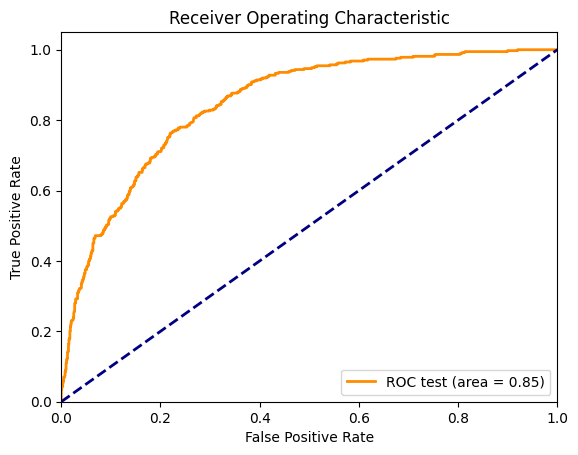

In [ ]:
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

# ROC curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC test (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


The model performs well in distinguishing between the classes, as indicated by the high AUC value and the shape of the ROC curve.

**Usefulness:**
This model could be effectively used for tasks where distinguishing between positive and negative instances is crucial, or customer churn prediction.
Overall, the ROC curve and AUC suggest that the model has a good balance between sensitivity (recall) and specificity (1 - FPR), making it a reliable tool for binary classification tasks.